# Latent MNIST data experiments
This file contains experiments for the latent MNIST data set. 

In [ ]:
import torch
from torch import nn, optim
import torch.nn.functional as F
import torchvision
import torch.distributions as dist
import numpy as np
import matplotlib.pyplot as plt
from GANmodel import *
from lineardatatools import p_y_zt_from_true_dist, linear_binary_ty_pydot
from matplotlib.lines import Line2D
from imagedata import *
from imagedatatools import *
%load_ext autoreload
%autoreload 2

In [2]:
netG = Generator(3)
netD = Discriminator()
netG.load_state_dict(torch.load("./GANmodels/3dGenerator"))
netD.load_state_dict(torch.load("./GANmodels/3dDiscriminator"))

<All keys matched successfully>

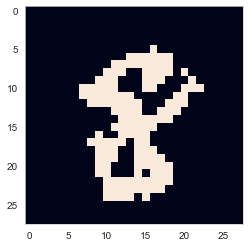

In [11]:
#Example image from the data generating distribution
z = torch.randn(1,3)[:,:,None,None]
im =((1+netG(z))/2).squeeze()
fig, ax = plt.subplots(1,1, figsize=(4,4))
plt.imshow(dist.Bernoulli(im).sample())
plt.grid(False)

# Generate data for loss scaling tests

In [20]:
main_folder = "imagedata"
sub_folder_data = "samplesize10000"

data_labels = ["data10000"]

generator = netG
c_x = np.array([1])
s_x = np.array([1])
t_a = np.array([1])
t_b = np.array([0.5])
y_a0 = np.array([2])
y_b0 = np.array([-0.5])
y_a1 = np.array([2])
y_b1 = np.array([0.5])
param_times = 10
gen_zdim=3
dataparameters = [[10000, gen_zdim, generator, t_a, t_b, y_a0, y_b0, y_a1, y_b1, c_x, s_x]]

In [5]:
#create_dfs_datasets(generate_image_data, dataparameters, param_times, repeat=True, main_folder=main_folder,
#                    sub_folder=sub_folder_data, labels=data_labels)

Step  0


({'data10000': {0:             z0        z1        z2        x0    t    y
   0    -0.057789 -0.010293 -0.019352  0.890668  1.0  1.0
   1     0.932049 -1.748248 -0.081486  2.265775  1.0  1.0
   2    -0.475757 -0.698813  1.020978 -2.019711  1.0  0.0
   3    -0.580332 -0.558669 -0.539320 -1.693516  0.0  0.0
   4    -2.659189 -0.367700 -1.159822 -2.197483  0.0  0.0
   ...        ...       ...       ...       ...  ...  ...
   9995  0.260161  1.209531  1.025875  0.199979  1.0  1.0
   9996 -0.699877 -1.283786 -1.347669 -0.294998  0.0  0.0
   9997 -0.115058  0.106983 -0.753738 -0.073806  1.0  1.0
   9998  0.852786  0.489220  2.380440  0.048521  1.0  1.0
   9999 -1.317630  1.006263  0.656765 -1.402415  0.0  0.0
   
   [10000 rows x 6 columns],
   1:             z0        z1        z2        x0    t    y
   0    -0.057789 -0.010293 -0.019352  0.890668  1.0  1.0
   1     0.932049 -1.748248 -0.081486  2.265775  1.0  1.0
   2    -0.475757 -0.698813  1.020978 -2.019711  1.0  0.0
   3    -0.580332 -0

In [21]:
dfs, datasets = load_dfs_datasets(main_folder, sub_folder_data, param_times)

# Run loss scaling tests

In [23]:
device='cuda'
plot_curves=True

z_dim = 20
x_dim = 1
param_times = 2

p_y_zt_nn=True
p_y_zt_nn_layers=3
p_y_zt_nn_width=30
p_t_z_nn=True
p_t_z_nn_layers=3
p_t_z_nn_width=30
p_x_z_nn=True
p_x_z_nn_layers=3
p_x_z_nn_width=30

image_loss_scaling = [1,0.5,0.2,0.1,0.05,0.03,0.01,0]

num_epochs = 500
lr_start = 0.003
lr_end = 0.001
separate_ty = True
train_parameters = [num_epochs, lr_start, lr_end, x_dim, z_dim,
              p_y_zt_nn, p_y_zt_nn_layers, p_y_zt_nn_width, 
              p_t_z_nn, p_t_z_nn_layers, p_t_z_nn_width,
              p_x_z_nn, p_x_z_nn_layers, p_x_z_nn_width, image_loss_scaling, separate_ty]

BATCH_SIZE = 1000

data_labels = ["data10000"]*len(image_loss_scaling)
labels = list(map(str,image_loss_scaling))

track_function = estimate_imageCEVAE_ATE
from lineardatatools import p_y_zt_from_true_dist, linear_binary_ty_pydot
p_y_zt1, p_y_zt0 = p_y_zt_from_true_dist(y_a0, y_b0, y_a1, y_b1)
p_y_dot1_true, p_y_dot0_true = linear_binary_ty_pydot(p_y_zt1, p_y_zt0)
true_value = (p_y_dot1_true, p_y_dot0_true)
sub_folder_model = "modelsamplesize10000scalings_1"

1
Epoch 0:
Image: 4039.249481201172, x: 20.443118572235107, t: 6.789130926132202, y: 6.444227516651154
0.22557511925697327 0.6241073608398438 0.3985322415828705
Epoch 20:
Image: 1050.5750579833984, x: 15.868812561035156, t: 1.5190417170524597, y: 1.5153367519378662
0.17461150884628296 0.6431739926338196 0.4685624837875366
Epoch 40:
Image: 731.3171234130859, x: 14.76120412349701, t: 0.5035662800073624, y: 0.9389286115765572
0.31895580887794495 0.7014923095703125 0.38253650069236755
Epoch 60:
Image: 640.4416084289551, x: 14.542551517486572, t: 0.5225617922842503, y: 0.9646566435694695
0.4773481786251068 0.715731143951416 0.2383829653263092
Epoch 80:
Image: 618.7622375488281, x: 14.475622296333313, t: 1.0732184648513794, y: 1.3759310245513916
0.551586389541626 0.7431449890136719 0.1915586292743683
Epoch 100:
Image: 582.291374206543, x: 14.436211943626404, t: 2.151664450764656, y: 2.253834620118141
0.5669461488723755 0.7431741952896118 0.17622801661491394
Epoch 120:
Image: 588.393108367919

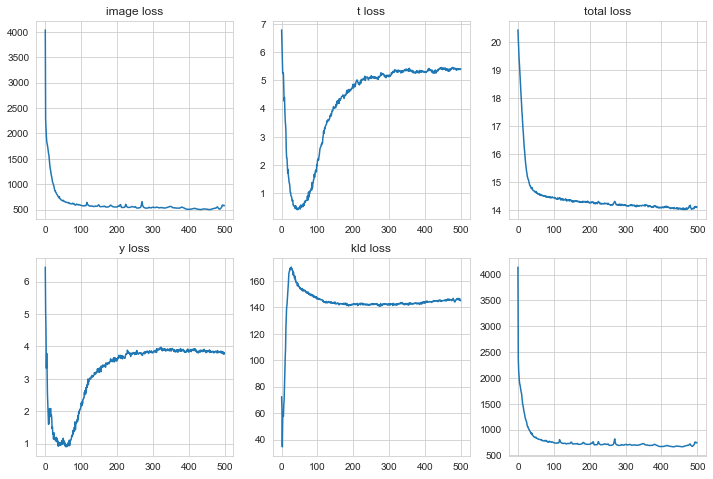

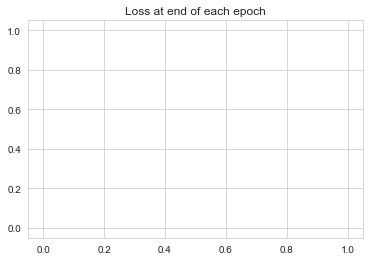

Estimated causal effect: (tensor(0.1716, device='cuda:0', grad_fn=<SubBackward0>), tensor(0.6716, device='cuda:0', grad_fn=<MeanBackward0>), tensor(0.5001, device='cuda:0', grad_fn=<MeanBackward0>)) true value: (0.5752425317376335, 0.42475746826236643)
1
Epoch 0:
Image: 3895.658203125, x: 20.456390380859375, t: 6.774144113063812, y: 6.398454368114471
0.23107224702835083 0.5966538786888123 0.3655816316604614
Epoch 20:
Image: 929.2752380371094, x: 15.89051377773285, t: 1.169506348669529, y: 0.8099136017262936
0.1439092457294464 0.6159921288490295 0.47208288311958313
Epoch 40:
Image: 699.2545394897461, x: 14.597110271453857, t: 0.5485577918589115, y: 0.4648373946547508
0.21226626634597778 0.6435127854347229 0.4312465190887451
Epoch 60:
Image: 662.7124938964844, x: 14.484182596206665, t: 0.9045368432998657, y: 0.8094502873718739
0.29831603169441223 0.6648776531219482 0.366561621427536
Epoch 80:
Image: 601.1271743774414, x: 14.432856559753418, t: 1.0828296169638634, y: 1.898030862212181
0.4

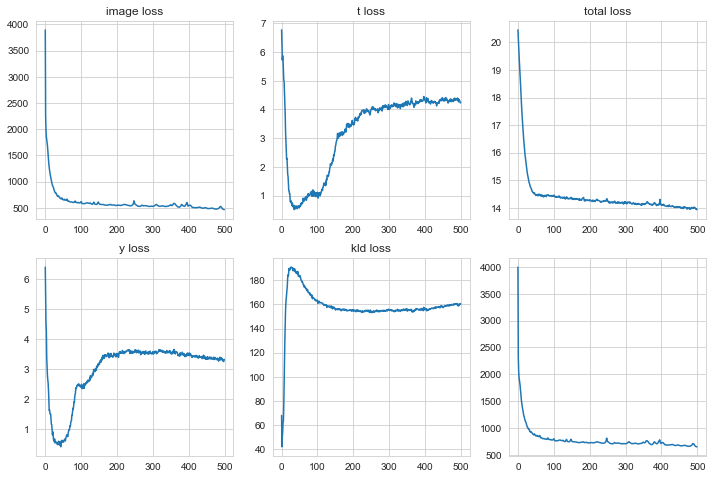

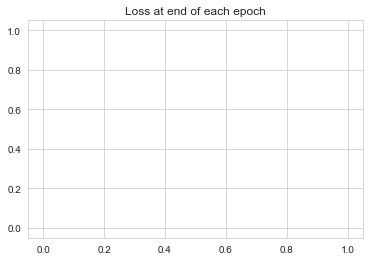

Estimated causal effect: (tensor(0.1985, device='cuda:0', grad_fn=<SubBackward0>), tensor(0.6848, device='cuda:0', grad_fn=<MeanBackward0>), tensor(0.4864, device='cuda:0', grad_fn=<MeanBackward0>)) true value: (0.5752425317376335, 0.42475746826236643)
0.5
Epoch 0:
Image: 1977.6638565063477, x: 20.464695930480957, t: 6.865929961204529, y: 6.424917459487915
0.2064376175403595 0.6552063226699829 0.4487687051296234
Epoch 20:
Image: 688.0753860473633, x: 16.3478422164917, t: 4.030548065900803, y: 1.8347027748823166
0.14435437321662903 0.6275356411933899 0.48318126797676086
Epoch 40:
Image: 456.44622802734375, x: 14.9347425699234, t: 2.2343388944864273, y: 2.218835562467575
0.40850549936294556 0.715702474117279 0.3071969747543335
Epoch 60:
Image: 374.7544937133789, x: 14.705241322517395, t: 2.805949941277504, y: 3.2079597413539886
0.5110666751861572 0.7704596519470215 0.25939300656318665
Epoch 80:
Image: 340.31417083740234, x: 14.607441663742065, t: 4.103489398956299, y: 3.8374094367027283


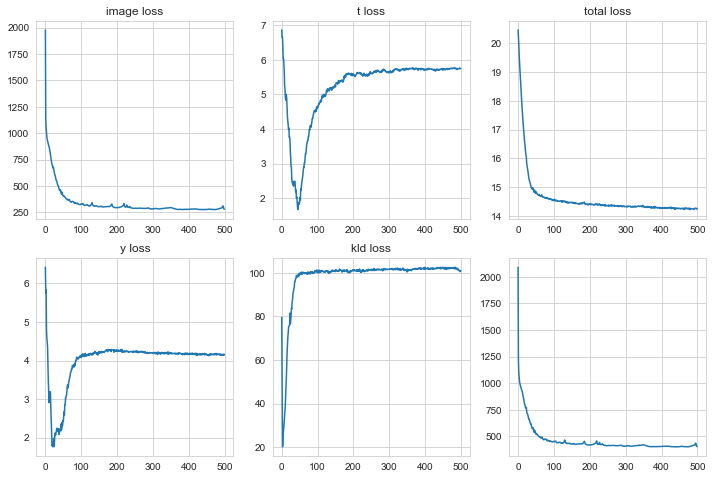

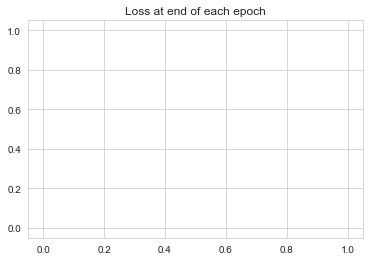

Estimated causal effect: (tensor(0.1718, device='cuda:0', grad_fn=<SubBackward0>), tensor(0.5977, device='cuda:0', grad_fn=<MeanBackward0>), tensor(0.4259, device='cuda:0', grad_fn=<MeanBackward0>)) true value: (0.5752425317376335, 0.42475746826236643)
0.5
Epoch 0:
Image: 1923.1011199951172, x: 20.404764890670776, t: 6.7152732610702515, y: 6.552201569080353
0.2003745436668396 0.6143159866333008 0.4139414429664612
Epoch 20:
Image: 614.172737121582, x: 16.121717929840088, t: 1.6787838488817215, y: 2.385449394583702
0.23474615812301636 0.551372230052948 0.31662607192993164
Epoch 40:
Image: 416.7128562927246, x: 14.803543210029602, t: 0.7466555535793304, y: 2.091458484530449
-0.042721062898635864 0.40669143199920654 0.4494124948978424
Epoch 60:
Image: 362.1163444519043, x: 14.378700256347656, t: 0.8990032598376274, y: 2.1452600210905075
-0.26570141315460205 0.39113879203796387 0.6568402051925659
Epoch 80:
Image: 332.2531280517578, x: 14.49491274356842, t: 2.2506586760282516, y: 3.232307225

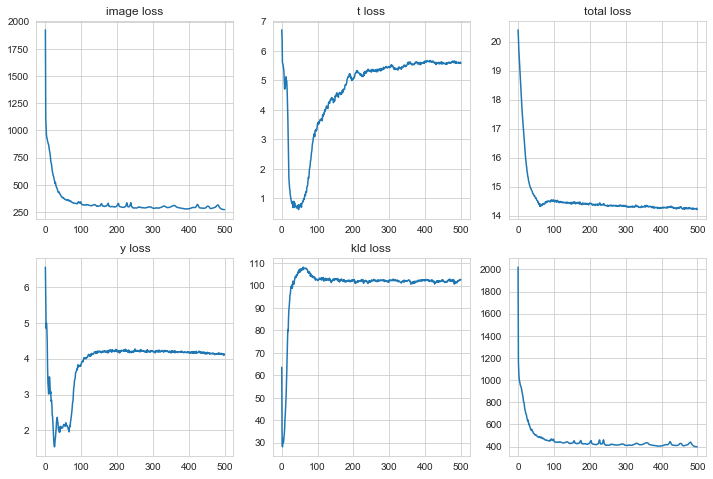

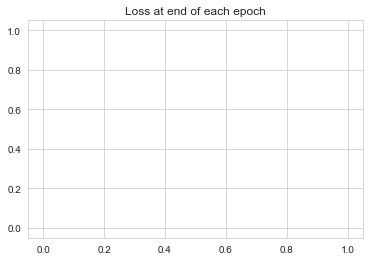

Estimated causal effect: (tensor(0.1890, device='cuda:0', grad_fn=<SubBackward0>), tensor(0.6232, device='cuda:0', grad_fn=<MeanBackward0>), tensor(0.4342, device='cuda:0', grad_fn=<MeanBackward0>)) true value: (0.5752425317376335, 0.42475746826236643)
0.2
Epoch 0:
Image: 815.186351776123, x: 20.43187975883484, t: 6.7048662304878235, y: 6.412937879562378
0.24514693021774292 0.6276780962944031 0.38253116607666016
Epoch 20:
Image: 319.03862953186035, x: 16.37098240852356, t: 5.588475286960602, y: 2.9531697928905487
0.18451258540153503 0.5939045548439026 0.40939196944236755
Epoch 40:
Image: 262.5111999511719, x: 15.210702657699585, t: 5.7757463455200195, y: 4.23909267783165
0.1907307505607605 0.5879921913146973 0.39726144075393677
Epoch 60:
Image: 237.10692024230957, x: 15.238973617553711, t: 5.713915586471558, y: 4.2378842532634735
0.16465705633163452 0.5785823464393616 0.41392529010772705
Epoch 80:
Image: 215.72182083129883, x: 14.967066884040833, t: 4.699069529771805, y: 4.154171049594

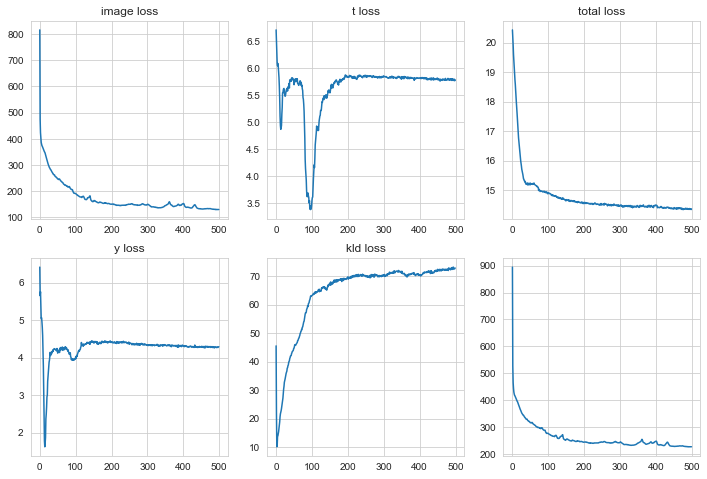

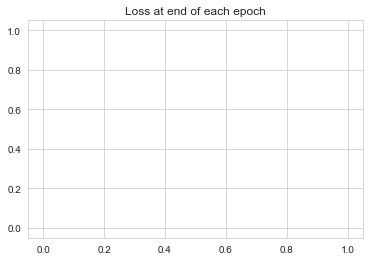

Estimated causal effect: (tensor(0.1665, device='cuda:0', grad_fn=<SubBackward0>), tensor(0.5931, device='cuda:0', grad_fn=<MeanBackward0>), tensor(0.4265, device='cuda:0', grad_fn=<MeanBackward0>)) true value: (0.5752425317376335, 0.42475746826236643)
0.2
Epoch 0:
Image: 798.3922729492188, x: 20.444753170013428, t: 6.775968909263611, y: 6.606888473033905
0.20476919412612915 0.6236016750335693 0.4188324809074402
Epoch 20:
Image: 341.80452728271484, x: 16.495402693748474, t: 5.138974040746689, y: 2.3682176023721695
0.03254401683807373 0.5423883199691772 0.5098443031311035
Epoch 40:
Image: 283.8932857513428, x: 15.029610991477966, t: 5.708399951457977, y: 4.275305867195129
0.17102107405662537 0.5972266793251038 0.4262056052684784
Epoch 60:
Image: 245.7395362854004, x: 15.081868290901184, t: 5.855620563030243, y: 4.397043406963348
0.20313164591789246 0.6166772246360779 0.4135455787181854
Epoch 80:
Image: 226.90777587890625, x: 15.074127554893494, t: 5.911367058753967, y: 4.455681025981903

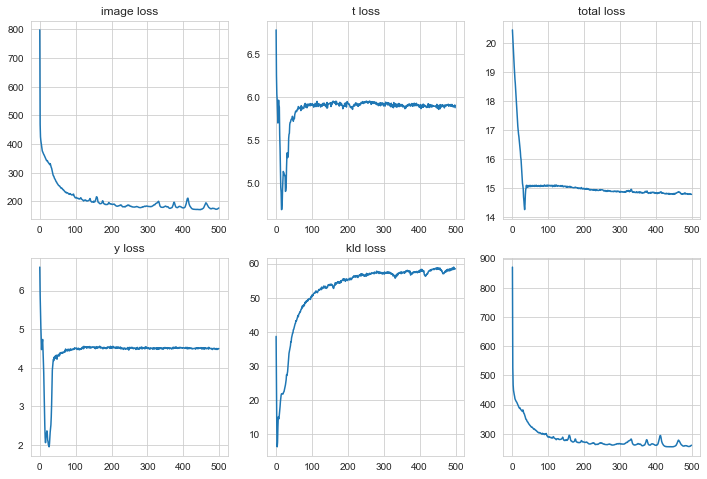

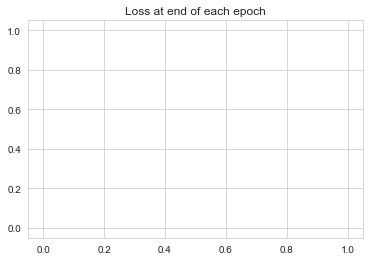

Estimated causal effect: (tensor(0.1944, device='cuda:0', grad_fn=<SubBackward0>), tensor(0.6053, device='cuda:0', grad_fn=<MeanBackward0>), tensor(0.4109, device='cuda:0', grad_fn=<MeanBackward0>)) true value: (0.5752425317376335, 0.42475746826236643)
0.1
Epoch 0:
Image: 418.2172203063965, x: 20.4515278339386, t: 6.722573399543762, y: 6.579586684703827
0.20600703358650208 0.6253842115402222 0.4193771779537201
Epoch 20:
Image: 184.98193168640137, x: 17.069735765457153, t: 5.746521294116974, y: 4.481121331453323
0.23945054411888123 0.6321492195129395 0.3926986753940582
Epoch 40:
Image: 163.0361452102661, x: 15.42880392074585, t: 5.306501716375351, y: 4.283481776714325
0.17032840847969055 0.5885902047157288 0.4182617962360382
Epoch 60:
Image: 137.4395694732666, x: 14.946454167366028, t: 5.404436111450195, y: 4.0970750749111176
0.19985896348953247 0.603312075138092 0.40345311164855957
Epoch 80:
Image: 119.2969856262207, x: 15.000863313674927, t: 5.756704390048981, y: 4.272637695074081
0.1

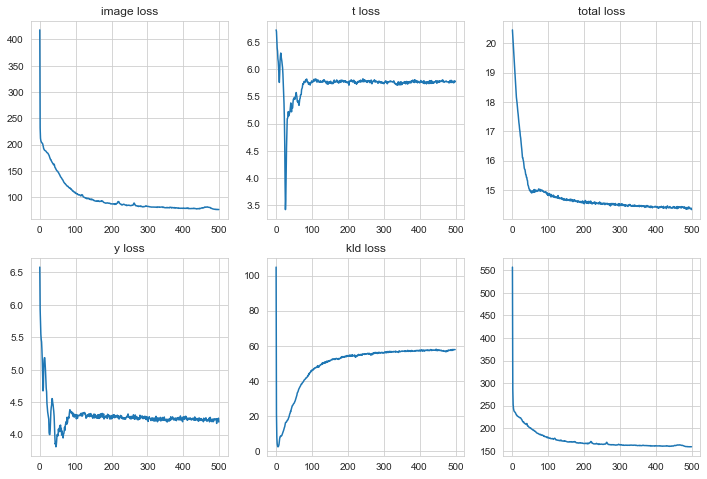

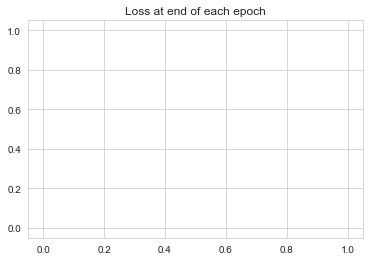

Estimated causal effect: (tensor(0.1534, device='cuda:0', grad_fn=<SubBackward0>), tensor(0.5891, device='cuda:0', grad_fn=<MeanBackward0>), tensor(0.4357, device='cuda:0', grad_fn=<MeanBackward0>)) true value: (0.5752425317376335, 0.42475746826236643)
0.1
Epoch 0:
Image: 404.8802318572998, x: 20.45054268836975, t: 6.8302125334739685, y: 6.516035795211792
0.24361735582351685 0.6061612963676453 0.3625439405441284
Epoch 20:
Image: 201.0964183807373, x: 17.021138668060303, t: 5.8327948451042175, y: 3.8418537974357605
0.19996601343154907 0.603293240070343 0.40332722663879395
Epoch 40:
Image: 198.9678955078125, x: 14.707518339157104, t: 5.045408695936203, y: 2.623052179813385
0.0010373592376708984 0.5211107730865479 0.520073413848877
Epoch 60:
Image: 174.5333595275879, x: 16.05620849132538, t: 5.620609939098358, y: 4.401485443115234
0.16812390089035034 0.5973420143127441 0.4292181134223938
Epoch 80:
Image: 165.36497688293457, x: 15.191567540168762, t: 5.381181597709656, y: 3.818294852972030

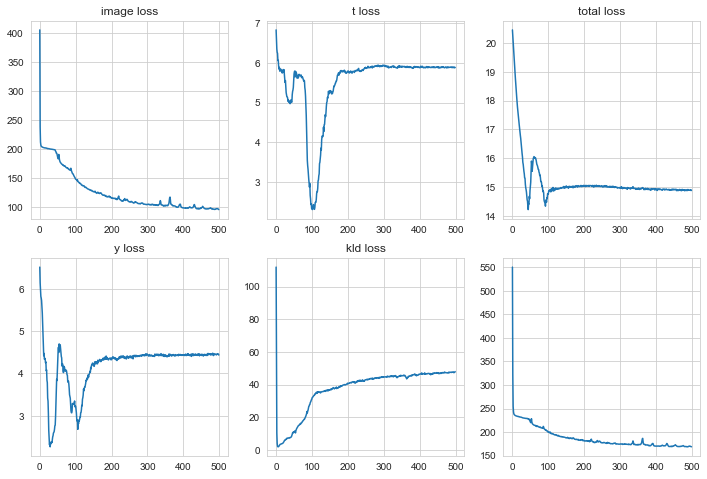

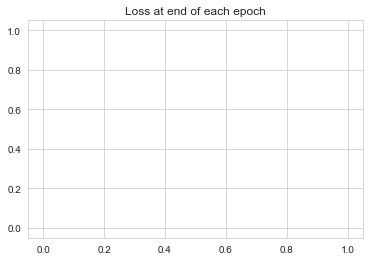

Estimated causal effect: (tensor(0.1872, device='cuda:0', grad_fn=<SubBackward0>), tensor(0.5942, device='cuda:0', grad_fn=<MeanBackward0>), tensor(0.4071, device='cuda:0', grad_fn=<MeanBackward0>)) true value: (0.5752425317376335, 0.42475746826236643)
0.05
Epoch 0:
Image: 198.45564079284668, x: 20.456775188446045, t: 6.705263078212738, y: 6.446618735790253
0.22580775618553162 0.6055431365966797 0.37973538041114807
Epoch 20:
Image: 99.5818099975586, x: 17.226102352142334, t: 6.075894057750702, y: 4.846930652856827
0.25933128595352173 0.6221712827682495 0.3628399968147278
Epoch 40:
Image: 91.15689945220947, x: 15.93397319316864, t: 5.662637531757355, y: 4.092534750699997
0.13481688499450684 0.5812307000160217 0.4464138150215149
Epoch 60:
Image: 86.82169437408447, x: 14.862725734710693, t: 5.2968229949474335, y: 3.7502604722976685
0.07652446627616882 0.5538273453712463 0.4773028790950775
Epoch 80:
Image: 83.03345680236816, x: 14.271770119667053, t: 5.632910788059235, y: 4.037483006715774

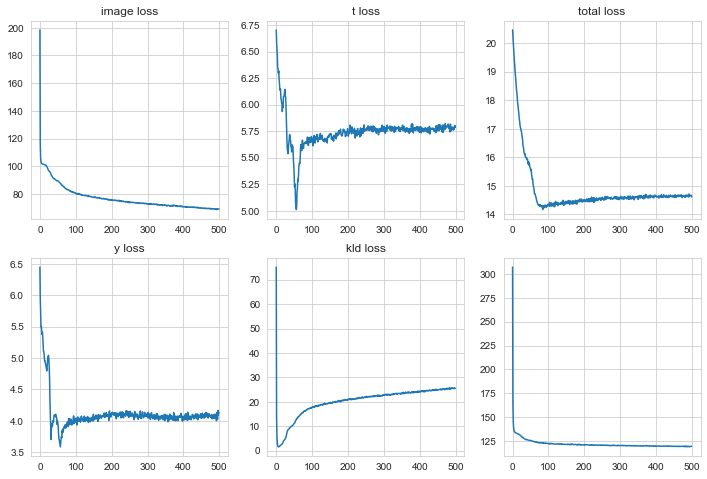

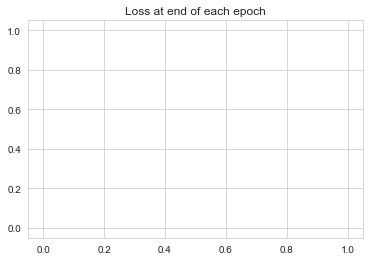

Estimated causal effect: (tensor(0.1440, device='cuda:0', grad_fn=<SubBackward0>), tensor(0.5704, device='cuda:0', grad_fn=<MeanBackward0>), tensor(0.4264, device='cuda:0', grad_fn=<MeanBackward0>)) true value: (0.5752425317376335, 0.42475746826236643)
0.05
Epoch 0:
Image: 212.96622943878174, x: 20.442670583724976, t: 6.743552088737488, y: 6.557921767234802
0.22692766785621643 0.5858843922615051 0.3589567244052887
Epoch 20:
Image: 100.5586633682251, x: 17.21288025379181, t: 5.945094645023346, y: 4.804764419794083
0.2602064907550812 0.6360344886779785 0.37582799792289734
Epoch 40:
Image: 92.44332504272461, x: 15.84449017047882, t: 5.528929054737091, y: 4.199978917837143
0.15560036897659302 0.5716996192932129 0.4160992503166199
Epoch 60:
Image: 88.94736099243164, x: 15.26963722705841, t: 4.523896425962448, y: 4.156837224960327
0.13758638501167297 0.5761301517486572 0.43854376673698425
Epoch 80:
Image: 85.09187507629395, x: 14.295966744422913, t: 5.37024512887001, y: 3.804761976003647
0.0

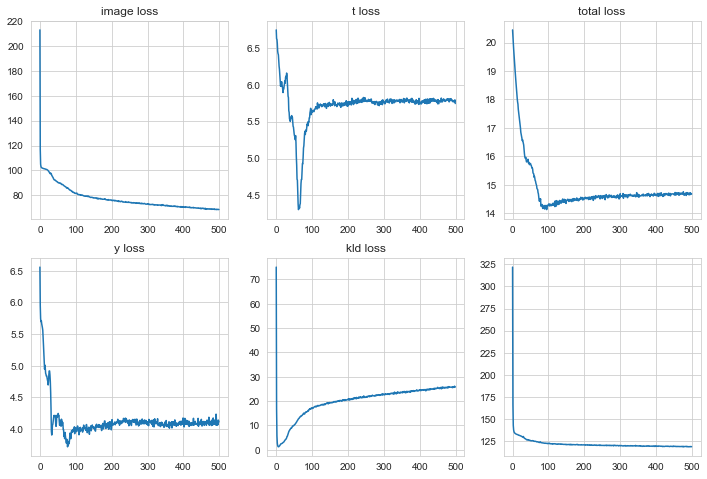

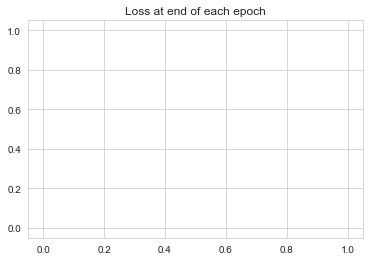

Estimated causal effect: (tensor(0.1401, device='cuda:0', grad_fn=<SubBackward0>), tensor(0.5680, device='cuda:0', grad_fn=<MeanBackward0>), tensor(0.4279, device='cuda:0', grad_fn=<MeanBackward0>)) true value: (0.5752425317376335, 0.42475746826236643)
0.03
Epoch 0:
Image: 116.40676259994507, x: 20.463294506072998, t: 6.775300979614258, y: 6.683725655078888
0.185227632522583 0.5718383193016052 0.3866106867790222
Epoch 20:
Image: 60.68899726867676, x: 17.505756497383118, t: 6.049877047538757, y: 5.178896605968475
0.2882419228553772 0.6405578851699829 0.3523159623146057
Epoch 40:
Image: 58.84527826309204, x: 15.80578327178955, t: 5.309467077255249, y: 3.630408674478531
0.0845365822315216 0.5461500883102417 0.4616135060787201
Epoch 60:
Image: 58.02115488052368, x: 14.835870623588562, t: 5.479157388210297, y: 4.019516587257385
0.12488347291946411 0.5698171257972717 0.4449336528778076
Epoch 80:
Image: 57.995619773864746, x: 14.449944734573364, t: 5.670128345489502, y: 4.114533096551895
0.14

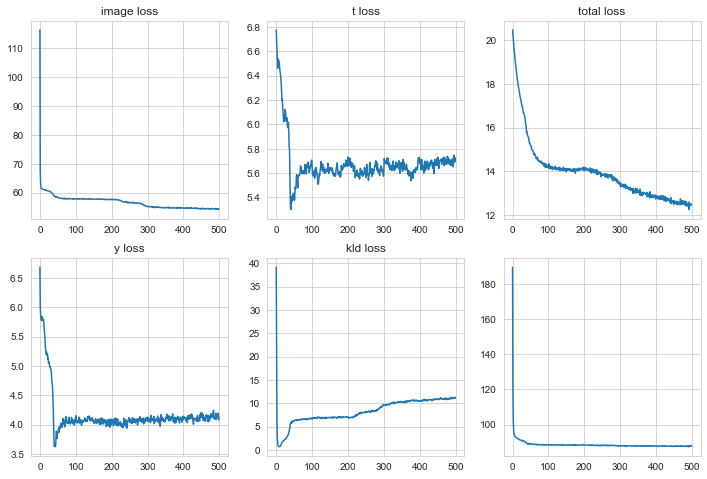

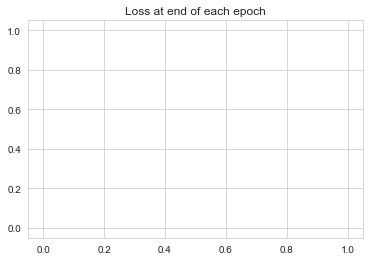

Estimated causal effect: (tensor(0.1367, device='cuda:0', grad_fn=<SubBackward0>), tensor(0.5795, device='cuda:0', grad_fn=<MeanBackward0>), tensor(0.4428, device='cuda:0', grad_fn=<MeanBackward0>)) true value: (0.5752425317376335, 0.42475746826236643)
0.03
Epoch 0:
Image: 113.59291172027588, x: 20.459990739822388, t: 6.743573069572449, y: 6.45085084438324
0.23950743675231934 0.6215988993644714 0.3820914626121521
Epoch 20:
Image: 60.741840839385986, x: 17.56999111175537, t: 6.119554817676544, y: 5.087106764316559
0.29229509830474854 0.6367813348770142 0.3444862365722656
Epoch 40:
Image: 58.70887041091919, x: 15.712307810783386, t: 5.54860520362854, y: 3.9781647324562073
0.11786502599716187 0.5854846239089966 0.4676195979118347
Epoch 60:
Image: 58.01184940338135, x: 14.877021551132202, t: 5.571775674819946, y: 4.026723653078079
0.13480761647224426 0.5743125677108765 0.4395049512386322
Epoch 80:
Image: 57.85256862640381, x: 14.338738679885864, t: 5.656336605548859, y: 4.113555461168289
0

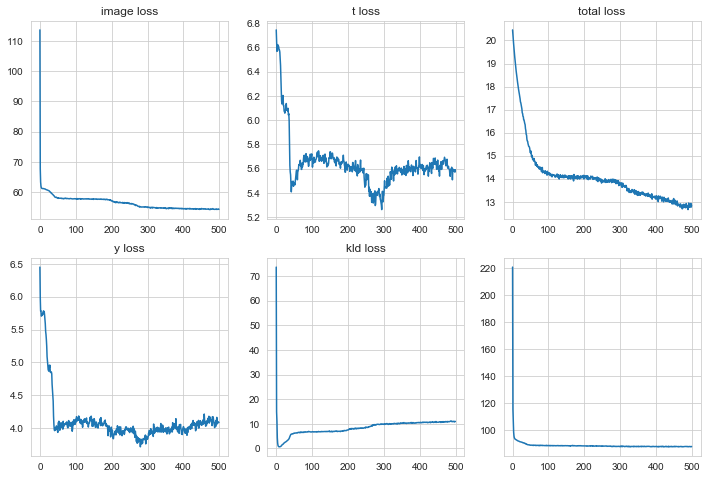

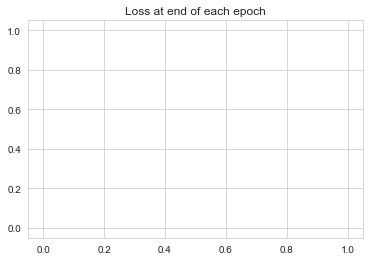

Estimated causal effect: (tensor(0.1251, device='cuda:0', grad_fn=<SubBackward0>), tensor(0.5756, device='cuda:0', grad_fn=<MeanBackward0>), tensor(0.4506, device='cuda:0', grad_fn=<MeanBackward0>)) true value: (0.5752425317376335, 0.42475746826236643)
0.01
Epoch 0:
Image: 39.18051862716675, x: 20.462488412857056, t: 6.929008364677429, y: 6.669571340084076
0.20893532037734985 0.5452104806900024 0.3362751603126526
Epoch 20:
Image: 20.2790687084198, x: 17.64442789554596, t: 6.180994689464569, y: 5.499239385128021
0.3334614932537079 0.6522220373153687 0.31876054406166077
Epoch 40:
Image: 20.02628207206726, x: 15.951350808143616, t: 5.153705298900604, y: 3.6469517946243286
0.08514726161956787 0.5504487752914429 0.465301513671875
Epoch 60:
Image: 19.889952063560486, x: 15.221205711364746, t: 5.418064177036285, y: 3.8221020698547363
0.11265453696250916 0.5663396120071411 0.45368507504463196
Epoch 80:
Image: 19.82821476459503, x: 14.535672903060913, t: 5.5955904722213745, y: 3.956803441047668

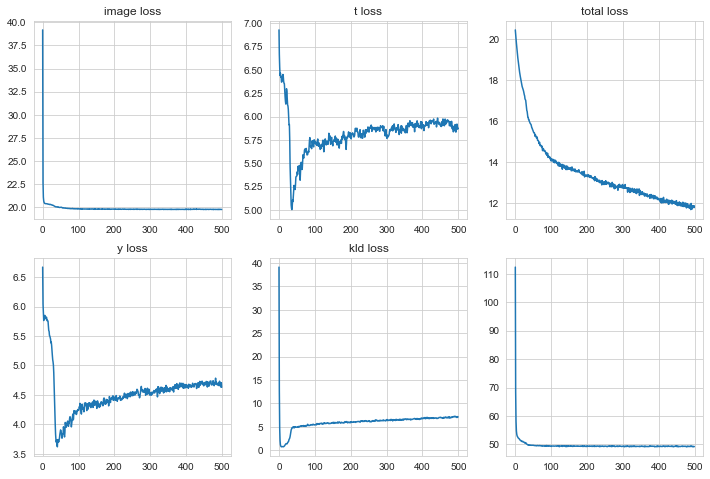

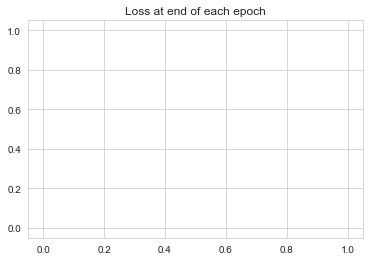

Estimated causal effect: (tensor(0.2073, device='cuda:0', grad_fn=<SubBackward0>), tensor(0.6018, device='cuda:0', grad_fn=<MeanBackward0>), tensor(0.3945, device='cuda:0', grad_fn=<MeanBackward0>)) true value: (0.5752425317376335, 0.42475746826236643)
0.01
Epoch 0:
Image: 40.99505877494812, x: 20.46334457397461, t: 6.677343487739563, y: 6.374464213848114
0.2982449531555176 0.6430496573448181 0.34480470418930054
Epoch 20:
Image: 20.2693452835083, x: 17.61524474620819, t: 6.049216866493225, y: 5.352334260940552
0.32055267691612244 0.6540235280990601 0.3334708511829376
Epoch 40:
Image: 20.02195405960083, x: 15.997808456420898, t: 5.417636334896088, y: 3.621640592813492
0.07714977860450745 0.5547264814376831 0.47757670283317566
Epoch 60:
Image: 19.887736558914185, x: 15.1522216796875, t: 5.47349351644516, y: 3.8951829075813293
0.11763763427734375 0.5720595121383667 0.45442187786102295
Epoch 80:
Image: 19.842265725135803, x: 14.59538459777832, t: 5.53337174654007, y: 4.084708154201508
0.12

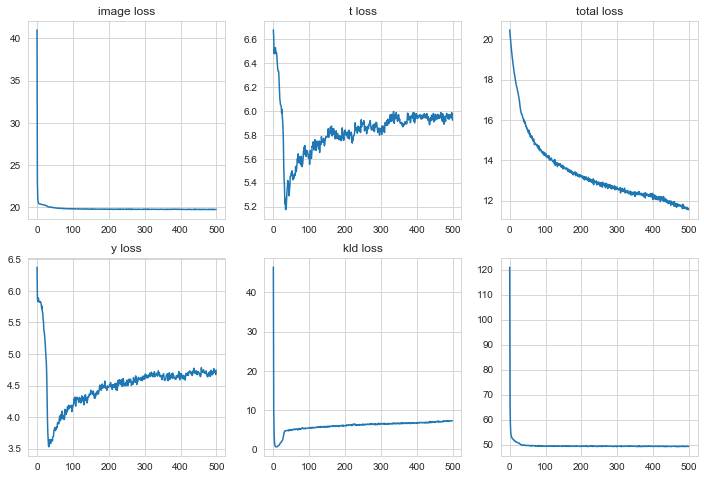

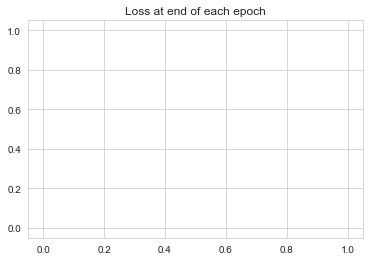

Estimated causal effect: (tensor(0.2071, device='cuda:0', grad_fn=<SubBackward0>), tensor(0.6042, device='cuda:0', grad_fn=<MeanBackward0>), tensor(0.3971, device='cuda:0', grad_fn=<MeanBackward0>)) true value: (0.5752425317376335, 0.42475746826236643)
0
Epoch 0:
Image: 0.0, x: 20.448622226715088, t: 6.649725258350372, y: 6.454084396362305
0.20822975039482117 0.6340888738632202 0.42585912346839905
Epoch 20:
Image: 0.0, x: 17.728014945983887, t: 6.2815539836883545, y: 5.5374996066093445
0.3383922278881073 0.6557134985923767 0.3173212707042694
Epoch 40:
Image: 0.0, x: 16.263495087623596, t: 5.265774458646774, y: 3.85434490442276
0.08684247732162476 0.5550631284713745 0.46822065114974976
Epoch 60:
Image: 0.0, x: 15.567092061042786, t: 5.498443841934204, y: 3.882667750120163
0.1105477511882782 0.5696291923522949 0.4590814411640167
Epoch 80:
Image: 0.0, x: 15.218000888824463, t: 5.604126989841461, y: 4.194181352853775
0.14337509870529175 0.5774033665657043 0.4340282678604126
Epoch 100:
Imag

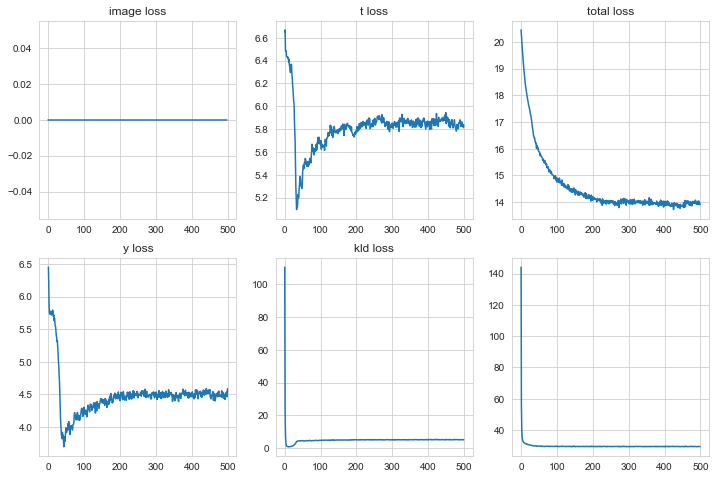

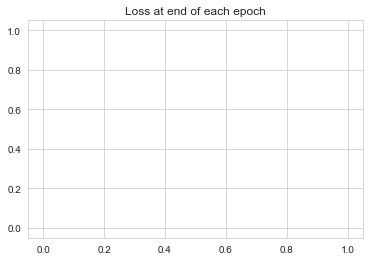

Estimated causal effect: (tensor(0.1825, device='cuda:0', grad_fn=<SubBackward0>), tensor(0.5909, device='cuda:0', grad_fn=<MeanBackward0>), tensor(0.4084, device='cuda:0', grad_fn=<MeanBackward0>)) true value: (0.5752425317376335, 0.42475746826236643)
0
Epoch 0:
Image: 0.0, x: 20.452949047088623, t: 6.868117570877075, y: 6.390530049800873
0.26854968070983887 0.640622615814209 0.3720729351043701
Epoch 20:
Image: 0.0, x: 17.835781574249268, t: 6.496358931064606, y: 5.810765445232391
0.3740328252315521 0.6746719479560852 0.3006391227245331
Epoch 40:
Image: 0.0, x: 17.12030827999115, t: 6.257461726665497, y: 5.399451166391373
0.3322391211986542 0.6556732654571533 0.32343414425849915
Epoch 60:
Image: 0.0, x: 16.042051196098328, t: 5.101893901824951, y: 4.264619678258896
0.1636475920677185 0.5650639533996582 0.4014163613319397
Epoch 80:
Image: 0.0, x: 15.273022532463074, t: 5.614446997642517, y: 4.183168053627014
0.14117997884750366 0.5818787217140198 0.4406987428665161
Epoch 100:
Image: 0.

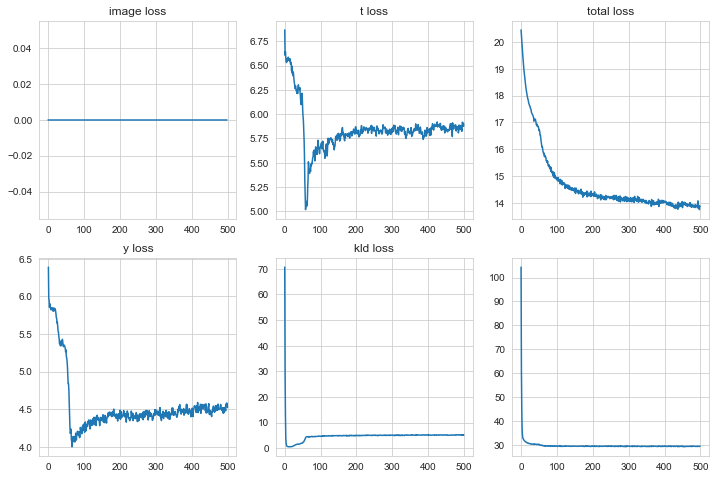

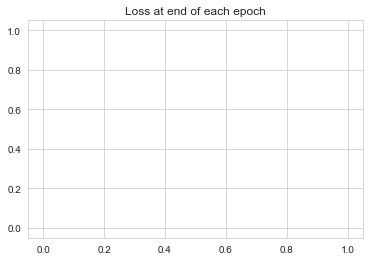

Estimated causal effect: (tensor(0.1912, device='cuda:0', grad_fn=<SubBackward0>), tensor(0.5990, device='cuda:0', grad_fn=<MeanBackward0>), tensor(0.4078, device='cuda:0', grad_fn=<MeanBackward0>)) true value: (0.5752425317376335, 0.42475746826236643)


({'1': {0: ImageCEVAE(
     (encoder): Encoder(
       (c1): Sequential(
         (0): Conv2d(1, 64, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2), bias=False)
         (1): ELU(alpha=1.0)
       )
       (c2): Sequential(
         (0): Conv2d(64, 128, kernel_size=(6, 6), stride=(2, 2), padding=(1, 1), bias=False)
         (1): ELU(alpha=1.0)
       )
       (c3): Sequential(
         (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
         (1): ELU(alpha=1.0)
       )
       (c4): Sequential(
         (0): Conv2d(256, 40, kernel_size=(3, 3), stride=(1, 1), bias=False)
         (1): ELU(alpha=1.0)
       )
       (fc): Sequential(
         (0): Linear(in_features=43, out_features=25, bias=True)
         (1): ELU(alpha=1.0)
       )
       (fc00): Sequential(
         (0): Linear(in_features=41, out_features=25, bias=True)
         (1): ELU(alpha=1.0)
       )
       (fc01): Sequential(
         (0): Linear(in_features=41, out_features=25, bias=T

In [364]:
#run_model_for_predef_datasets(datasets, param_times, main_folder, sub_folder_model, BATCH_SIZE, track_function, true_value,
#                                  device, train_parameters, labels, data_labels, overwrite=False)

# Load results

In [24]:
sub_folder_model = "modelsamplesize10000scalings"
models_scaling, losses_scaling = load_models_losses(main_folder, sub_folder_model, train_parameters, labels, device)
pydot1s, pydot0s = load_pydots(main_folder, sub_folder_model, labels, device)

In [7]:
#Get the p(y|do(t)) values
pydot1s = {}
pydot0s = {}
for key in pydot1s_1:
    pydot1s[key] = pydot1s[key].copy()
    pydot0s[key] = pydot0s[key].copy()

p_y_zt1, p_y_zt0 = p_y_zt_from_true_dist(y_a0, y_b0, y_a1, y_b1)
p_y_dot1_true, p_y_dot0_true = linear_binary_ty_pydot(p_y_zt1, p_y_zt0)

dict_keys([0, 1, 2, 3])

In [28]:
#Estimate the AID values at the end of training
z = np.random.randn(100000)
pt = sigmoid(t_a + t_b*z).mean()
pt

final_AID = np.zeros((4,4))
scalings_to_plot = [1,0.1,0.05,0.01]
for i,label in enumerate(map(str, scalings_to_plot)):
    pydot1 = np.array([pydot1s_1[label][0][-1],pydot1s_1[label][1][-1],
                      pydot1s_2[label][0][-1],pydot1s_2[label][1][-1]])
    pydot0 = np.array([pydot0s_1[label][0][-1],pydot0s_1[label][1][-1],
                      pydot0s_2[label][0][-1],pydot0s_2[label][1][-1]])
    final_AID[:,i] = np.abs(pydot1 - p_y_dot1_true)*pt + np.abs(pydot0 - p_y_dot0_true)*(1-pt)

# Plot results

In [30]:
import matplotlib as mpl
mpl.style.use('default')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"]})

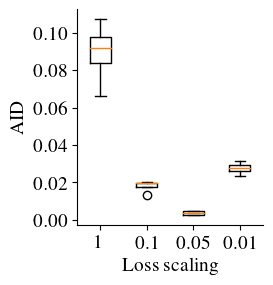

In [31]:
plt.figure(figsize=(2.4,2.8))
plt.boxplot(final_AID)
plt.xticks(range(1,5),scalings_to_plot)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel("Loss scaling", fontsize=14)
plt.ylabel("AID", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


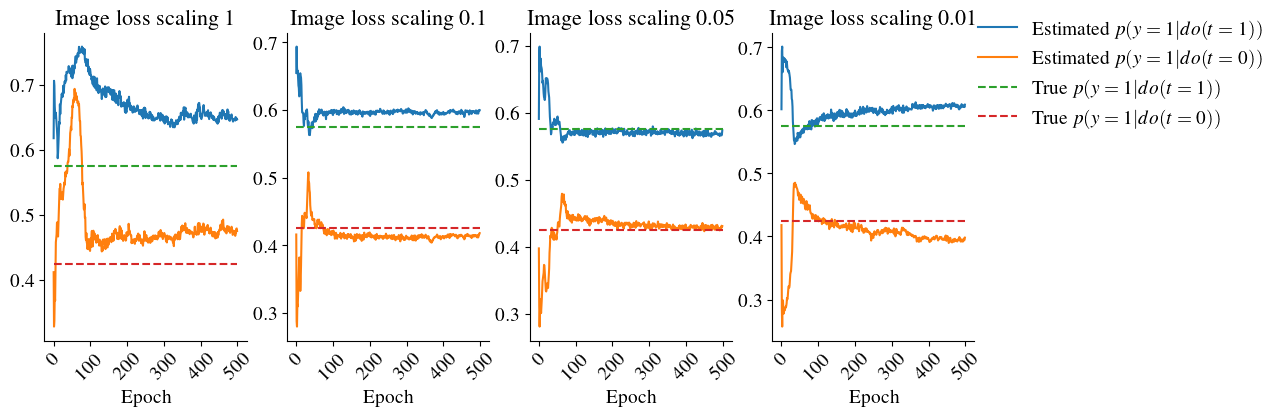

In [33]:
fig, ax = plt.subplots(1,4, figsize=(12,4))

scalings_to_plot = [1,0.1,0.05,0.01]
for i,label in enumerate(map(str, scalings_to_plot)):
    ax[i].plot(pydot1s[label][0])
    ax[i].plot(pydot0s[label][0])
    ax[i].plot([0,500],[p_y_dot1_true,p_y_dot1_true],'--')
    ax[i].plot([0,500],[p_y_dot0_true,p_y_dot0_true],'--')
    ax[i].set_title("Image loss scaling "  + label, fontsize=16)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].set_xticks([0,100,200,300,400,500])
    ax[i].set_xlabel("Epoch", fontsize=14)
    ax[i].tick_params(axis='x', which='major', labelsize=14, rotation=45)
    ax[i].tick_params(axis='y', which='major', labelsize=14)
ax[3].legend(["Estimated $p(y=1|do(t=1))$","Estimated $p(y=1|do(t=0))$",
                  "True $p(y=1|do(t=1))$","True $p(y=1|do(t=0))$"], frameon=False,
             bbox_to_anchor=(0.93,1.1), loc="upper left", fontsize=14)

# Additional: Direct adjustment fits

In [36]:
dataset = datasets['data10000'][0]

Epoch 0
Epoch 5
Epoch 10
Epoch 15
Epoch 20
Epoch 25
Epoch 30
Epoch 35
Epoch 40
Epoch 45
Epoch 50
Epoch 55
Epoch 60
Epoch 65
Epoch 70
Epoch 75
Epoch 80
Epoch 85
Epoch 90
Epoch 95


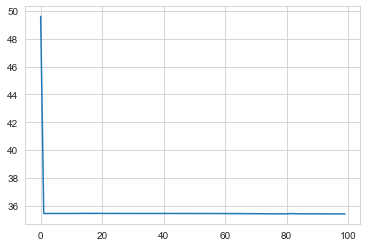

In [30]:
#Total direct fit
model = trainconvynet(device='cuda', num_epochs=100, dataset=dataset, BATCH_SIZE=500, lr_start=0.005, lr_end=0.001)

In [31]:
modelsubfolder = "directfitparams"
torch.save(model.state_dict(), "./data/{}/{}/model_directfit".format(main_folder,modelsubfolder))

In [39]:
modelsubfolder = "directfitparams"
model = ConvyNet()
model.load_state_dict(torch.load("data/{}/{}/model_directfit".format(main_folder, modelsubfolder)))

<All keys matched successfully>

In [43]:
dataloader = DataLoader(dataset, batch_size=500)
ypred1 = 0
ypred0 = 0
torch.cuda.empty_cache()
def process_batch(batch,ypred1,ypred0):
    image = batch['image'].to('cuda')
    x = batch['X'].to('cuda')
    ypred1 += torch.sigmoid(model(image,x,torch.ones(x.shape[0],1).to(device))).sum().item()
    ypred0 += torch.sigmoid(model(image,x,torch.zeros(x.shape[0],1).to(device))).sum().item()
    del batch, image, x
    torch.cuda.empty_cache()
    return  ypred1, ypred0

for batch in dataloader:
    ypred1,ypred0 = process_batch(batch,ypred1,ypred0)
    
pydot1_image = ypred1 / 10000
pydot0_image = ypred0 / 10000

In [44]:
print("Direct adjustment estimates: p(y|do(t=0)):", pydot0_image, "p(y|do(t=1)):" ,pydot1_image)
print("Correct values: p(y|do(t=0)):", p_y_dot0_true, "p(y|do(t=1)):" ,p_y_dot1_true)

Direct adjustment estimates: p(y|do(t=0)): 0.29626687622070313 p(y|do(t=1)): 0.6656614349365234
Correct values: p(y|do(t=0)): 0.42475746826236643 p(y|do(t=1)): 0.5752425317376335
